<a href="https://colab.research.google.com/github/Suratan63011017/DataStructures-And-Algorithm-Grader/blob/main/Lab4_63010069_63011017.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opencv-python
!pip install numpy
!pip install matplotlib
!pip install tensorflow==2.9
!pip install scikit-learn
!pip install tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 84.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 105.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 46.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 74.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 111.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 61.1 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.13.1
    Uninstalling keras-2.13.1:
      Successfully uninstalled keras-2.13.1
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.5.26
    Uninstalling flatbuffers-23.5.26:
      Successfully uninstalled flatbuffers-23.5.26
  Attempting uninstall: tensor

In [2]:
#Array, image processing
import cv2
import numpy as np
import matplotlib.pyplot as plt
#Model Operation
from keras import Model, Input
import keras.utils as image
# from keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, UpSampling2D
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
# io
import glob
from tqdm import tqdm
import warnings;
warnings.filterwarnings('ignore')
import zipfile
import os
import numpy as np
from PIL import Image
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import glob
from tensorflow.keras.preprocessing.image import load_img, img_to_array

image_paths = glob.glob("/content/drive/MyDrive/dataa/data/*/*.jpg")  # Update the path
images = []

for path in tqdm(image_paths):
    img = load_img(path, target_size=(80, 80), interpolation="nearest")
    img_array = img_to_array(img)
    images.append(img_array)

100%|██████████| 3203/3203 [14:54<00:00,  3.58it/s]


In [5]:
images = np.array(images) / 255.0

In [6]:
train_x, test_x = train_test_split(images, test_size=0.3, random_state=42)
train_x, val_x = train_test_split(train_x, test_size=0.2, random_state=42)

In [7]:
noise_mean = 0
noise_std = 0.5
noise_factor = 0.3

In [8]:
noisy_train_x = train_x + (noise_factor * np.random.normal(loc=noise_mean, scale=noise_std, size=train_x.shape))
noisy_val_x = val_x + (noise_factor * np.random.normal(loc=noise_mean, scale=noise_std, size=val_x.shape))
noisy_test_x = test_x + (noise_factor * np.random.normal(loc=noise_mean, scale=noise_std, size=test_x.shape))

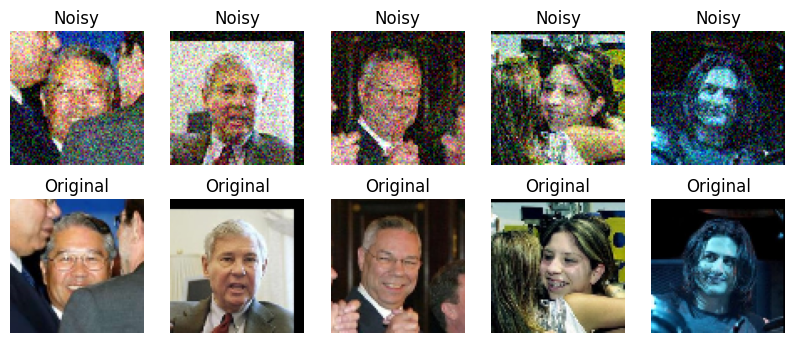

In [9]:
n = 5
plt.figure(figsize=(10, 4))

for i in range(n):
    # Original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(noisy_train_x[i])
    plt.title("Noisy")
    plt.axis("off")

    # Noisy image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(train_x[i])
    plt.title("Original")
    plt.axis("off")

plt.show()

In [10]:
input_img = Input(shape=(80, 80, 3))

In [11]:
# Layer 1
x1 = Conv2D(256, (3, 3), activation='relu', padding='same')(input_img)

# Layer 2
x2 = Conv2D(128, (3, 3), activation='relu', padding='same')(x1)
x3 = MaxPool2D((2, 2), strides=(2, 2))(x2)

# Layer 3
x4 = Conv2D(64, (3, 3), activation='relu', padding='same')(x3)

# Layer 4
x5 = Conv2D(64, (3, 3), activation='relu', padding='same')(x4)

x6 = UpSampling2D((2, 2))(x5)

x7 = Conv2D(128, (3, 3), activation='relu', padding='same')(x6)


x8 = Conv2D(256, (3, 3), activation='relu', padding='same')(x7)


x9 = Conv2D(3, (3, 3), activation='relu', padding='same')(x8)

# Create the autoencoder model
autoencoder = Model(input_img, x9)

# Compile the autoencoder model
autoencoder.compile(optimizer='adam', loss='mse')

# Display the model summary
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 80, 80, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 80, 80, 256)       7168      
                                                                 
 conv2d_1 (Conv2D)           (None, 80, 80, 128)       295040    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 40, 40, 128)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 40, 40, 64)        73792     
                                                                 
 conv2d_3 (Conv2D)           (None, 40, 40, 64)        36928     
                                                             

In [12]:
callback = EarlyStopping(monitor='loss', patience=3)
history = autoencoder.fit(
    noisy_train_x,
    train_x,
    epochs=16,
    batch_size=128,
    shuffle=True,
    validation_data=(noisy_val_x, val_x),
    callbacks=[callback],
    verbose=1
)

Epoch 1/16
15/15 [==============================] - 16s 256ms/step - loss: 0.1386 - val_loss: 0.0512
Epoch 2/16
15/15 [==============================] - 3s 177ms/step - loss: 0.0314 - val_loss: 0.0221
Epoch 3/16
15/15 [==============================] - 3s 178ms/step - loss: 0.0175 - val_loss: 0.0146
Epoch 4/16
15/15 [==============================] - 3s 177ms/step - loss: 0.0133 - val_loss: 0.0129
Epoch 5/16
15/15 [==============================] - 3s 177ms/step - loss: 0.0108 - val_loss: 0.0078
Epoch 6/16
15/15 [==============================] - 3s 179ms/step - loss: 0.0065 - val_loss: 0.0059
Epoch 7/16
15/15 [==============================] - 3s 177ms/step - loss: 0.0054 - val_loss: 0.0051
Epoch 8/16
15/15 [==============================] - 3s 177ms/step - loss: 0.0048 - val_loss: 0.0047
Epoch 9/16
15/15 [==============================] - 3s 177ms/step - loss: 0.0044 - val_loss: 0.0043
Epoch 10/16
15/15 [==============================] - 3s 177ms/step - loss: 0.0041 - val_loss: 0.004

In [13]:
predictions_test = autoencoder.predict(noisy_test_x)

31/31 [==============================] - 1s 16ms/step


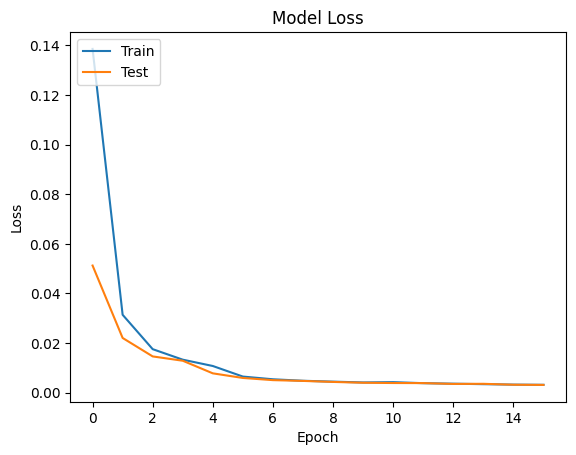

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

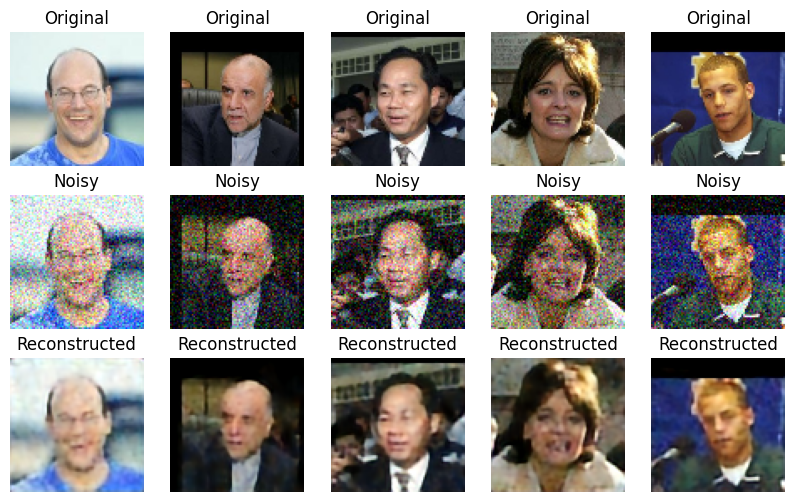

In [15]:

n = 5  # Number of images to display
plt.figure(figsize=(10, 6))

for i in range(n):
    # Original image
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(test_x[i])
    plt.title('Original')
    plt.axis('off')

    # Noisy image
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(noisy_test_x[i])
    plt.title('Noisy')
    plt.axis('off')

    # Reconstructed image
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(predictions_test[i])
    plt.title('Reconstructed')
    plt.axis('off')

plt.show()

In [16]:
def create_autoencoder(optimizer='adam', learning_rate=0.001, batch_size=16, epochs=2):
    input_img = Input(shape=(80, 80, 3))

    # Layer 1
    x1 = Conv2D(256, (3, 3), activation='relu', padding='same')(input_img)

    # Layer 2
    x2 = Conv2D(128, (3, 3), activation='relu', padding='same')(x1)
    x3 = MaxPool2D((2, 2), strides=(2, 2))(x2)

    # Layer 3
    x4 = Conv2D(64, (3, 3), activation='relu', padding='same')(x3)

    # Layer 4
    x5 = Conv2D(64, (3, 3), activation='relu', padding='same')(x4)

    x6 = UpSampling2D((2, 2))(x5)

    x7 = Conv2D(128, (3, 3), activation='relu', padding='same')(x6)

    x8 = Conv2D(256, (3, 3), activation='relu', padding='same')(x7)

    x9 = Conv2D(3, (3, 3), activation='relu', padding='same')(x8)

    model = Model(input_img, x9)
    # Compile the model
    # Set the optimizer based on the input argument
    if optimizer == 'adam':
        custom_optimizer = Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
        custom_optimizer = RMSprop(learning_rate=learning_rate)
    else:
        raise ValueError("Invalid optimizer specified. Supported optimizers are 'adam' and 'rmsprop'.")

    model.compile(optimizer=custom_optimizer, loss='mean_squared_error')

    return model

In [17]:
from keras.wrappers.scikit_learn import KerasRegressor
model = KerasRegressor(build_fn=create_autoencoder, epochs=2, batch_size=16, verbose=0)

In [18]:
opts = ['adam', 'rmsprop']  # Add more optimizers as needed
lnR = [0.001]  # Learning rates to experiment with
bs = [2, 32]  # Batch sizes to experiment with
eps = [200, 400]  # Number of epochs to experiment with


param_grid = dict(batch_size=bs, epochs=eps, optimizer=opts, learning_rate=lnR)

grid = GridSearchCV(estimator=model, verbose=10,cv=4, param_grid=param_grid)

# Run the grid search
grid_result = grid.fit(noisy_train_x, train_x)

# Display the best parameters and best score
best_params = grid_result.best_params_
best_score = grid_result.best_score_
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Display mean and standard deviation of scores for each set of hyperparameters
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, std, param in zip(means, stds, params):
    print(f"Mean: {mean}, Std: {std}, Params: {param}")

Fitting 4 folds for each of 8 candidates, totalling 32 fits
[CV 1/4; 1/8] START batch_size=2, epochs=200, learning_rate=0.001, optimizer=adam
[CV 1/4; 1/8] END batch_size=2, epochs=200, learning_rate=0.001, optimizer=adam;, score=-0.002 total time=10.1min
[CV 2/4; 1/8] START batch_size=2, epochs=200, learning_rate=0.001, optimizer=adam
[CV 2/4; 1/8] END batch_size=2, epochs=200, learning_rate=0.001, optimizer=adam;, score=-0.002 total time=11.2min
[CV 3/4; 1/8] START batch_size=2, epochs=200, learning_rate=0.001, optimizer=adam
[CV 3/4; 1/8] END batch_size=2, epochs=200, learning_rate=0.001, optimizer=adam;, score=-0.002 total time=11.2min
[CV 4/4; 1/8] START batch_size=2, epochs=200, learning_rate=0.001, optimizer=adam
[CV 4/4; 1/8] END batch_size=2, epochs=200, learning_rate=0.001, optimizer=adam;, score=-0.002 total time=11.1min
[CV 1/4; 2/8] START batch_size=2, epochs=200, learning_rate=0.001, optimizer=rmsprop
[CV 1/4; 2/8] END batch_size=2, epochs=200, learning_rate=0.001, optimi

In [19]:
best_epoch = best_params['epochs']
best_batch_size = best_params['batch_size']
best_optimizer = best_params['optimizer']
best_learning_rate = best_params['learning_rate']

In [20]:
best_optimizer

'adam'

In [21]:
best_learning_rate

0.001

In [22]:
best_optimizer

'adam'

In [23]:
best_learning_rate

0.001

In [24]:
input_img = Input(shape=(80, 80, 3))

In [25]:
# Layer 1
x1 = Conv2D(256, (3, 3), activation='relu', padding='same')(input_img)

# Layer 2
x2 = Conv2D(128, (3, 3), activation='relu', padding='same')(x1)
x3 = MaxPool2D((2, 2), strides=(2, 2))(x2)

# Layer 3
x4 = Conv2D(64, (3, 3), activation='relu', padding='same')(x3)

# Layer 4
x5 = Conv2D(64, (3, 3), activation='relu', padding='same')(x4)

x6 = UpSampling2D((2, 2))(x5)

x7 = Conv2D(128, (3, 3), activation='relu', padding='same')(x6)


x8 = Conv2D(256, (3, 3), activation='relu', padding='same')(x7)


x9 = Conv2D(3, (3, 3), activation='relu', padding='same')(x8)

# Create the autoencoder model
autoencoder = Model(input_img, x9)

autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Display the model summary
autoencoder.summary()

Model: "model_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_35 (InputLayer)       [(None, 80, 80, 3)]       0         
                                                                 
 conv2d_238 (Conv2D)         (None, 80, 80, 256)       7168      
                                                                 
 conv2d_239 (Conv2D)         (None, 80, 80, 128)       295040    
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 40, 40, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_240 (Conv2D)         (None, 40, 40, 64)        73792     
                                                                 
 conv2d_241 (Conv2D)         (None, 40, 40, 64)        36928     
                                                          

In [26]:
callback = EarlyStopping(monitor='loss', patience=3)
history = autoencoder.fit(
    noisy_train_x,
    train_x,
    epochs=best_epoch,
    batch_size=best_batch_size,
    shuffle=True,
    validation_data=(noisy_val_x, val_x),
    callbacks=[callback]
)

Epoch 1/200
57/57 [==============================] - 4s 54ms/step - loss: 0.0325 - val_loss: 0.0105
Epoch 2/200
57/57 [==============================] - 3s 49ms/step - loss: 0.0059 - val_loss: 0.0045
Epoch 3/200
57/57 [==============================] - 3s 49ms/step - loss: 0.0041 - val_loss: 0.0047
Epoch 4/200
57/57 [==============================] - 3s 49ms/step - loss: 0.0035 - val_loss: 0.0031
Epoch 5/200
57/57 [==============================] - 3s 49ms/step - loss: 0.0030 - val_loss: 0.0028
Epoch 6/200
57/57 [==============================] - 3s 49ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 7/200
57/57 [==============================] - 3s 49ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 8/200
57/57 [==============================] - 3s 49ms/step - loss: 0.0026 - val_loss: 0.0026
Epoch 9/200
57/57 [==============================] - 3s 49ms/step - loss: 0.0025 - val_loss: 0.0027
Epoch 10/200
57/57 [==============================] - 3s 49ms/step - loss: 0.0031 - val_loss: 0.0025

In [ ]:
predictions_test = autoencoder.predict(noisy_test_x)

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

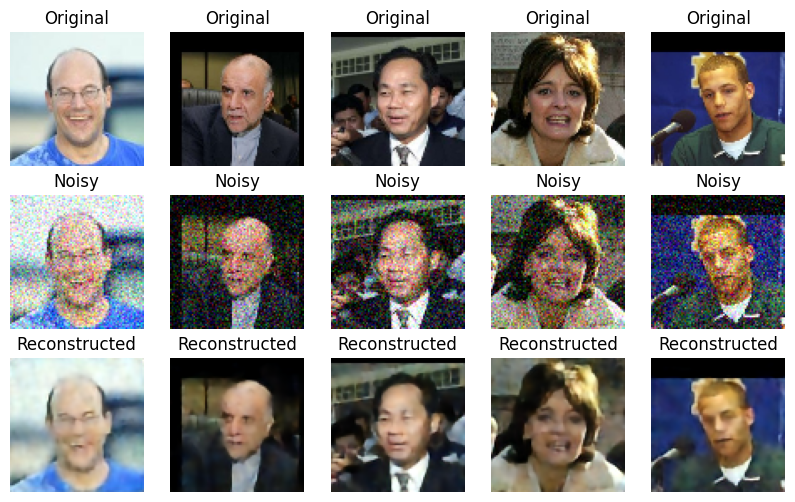

In [29]:
n = 5  # Number of images to display
plt.figure(figsize=(10, 6))

for i in range(n):
    # Original image
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(test_x[i])
    plt.title('Original')
    plt.axis('off')

    # Noisy image
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(noisy_test_x[i])
    plt.title('Noisy')
    plt.axis('off')

    # Reconstructed image
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(predictions_test[i])
    plt.title('Reconstructed')
    plt.axis('off')

plt.show()